### BoomBikes Bike Sharing

<b> By:Ishita Arora (MLC35 Batch)<b>

**Problem:**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider `BoomBikes` has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

The company wants to know:
	- Which variables are significant in predicting the demand for shared bikes.
	- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

**Business Solution**:<br>
Modelling the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.Then they can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# **Importing Libraries**

In [1]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


# **STEP 1 - Read And Understanding The Data**

In [3]:
#Read the data
biking = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Linear Regression/Excel File /day.csv')
biking.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
biking.shape

(730, 16)

In [5]:
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Checking Duplicates
biking.duplicated().sum()

0

**Analysis**



*   There are no Null Values or missing data present
*   All columns have numerical data except date
*   There are no duplicates values





**Drop Column**



As per analysis, we donot require some of the columns
1.   instant - record index - which does  not have any significance
2.   temp and atemp are related to each other, so will be using one that is temp

3.   casual & registered - cnt includes both casual and registered
4.   dteday - This is no use








In [7]:
#Dropping columns
biking.drop(['instant', 'atemp', 'casual', 'registered','dteday'], axis = 1, inplace = True)

In [8]:
biking.shape

(730, 11)

In [9]:
#Categorical Values
categorical_variables = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'] 
biking[categorical_variables] = biking[categorical_variables].astype('category')

#Numerical Values 
numerical_values = ['temp', 'hum','windspeed','cnt']

In [10]:
#Getting insights of numeric variable
biking.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


In [11]:
#Getting insights of categorical variable
biking.describe(include = ['category'])

,season,yr,mnth,holiday,weekday,workingday,weathersit
count,730,730,730,730,730,730,730
unique,4,2,12,2,7,2,3
top,3,0,1,0,0,1,1
freq,188,365,62,709,105,499,463


# **STEP 2 - Visualising The Data**

Below categorical columns are having following catecteristics and can be maped with respective values:


*   season:column is having four seasons as (1:spring, 2:summer, 3:fall, 4:winter)
* mnth :column is having 12 categorical values denoting for months Jan to Dec

*   weathersit: is having for categorical values (1: Clear_FewClouds, 2: Mist_Cloudy, 3: LightSnow_LightRain, 4: HeavyRain_IcePallets)
*   weekday: column having 7 varibles ( 0 to 6 ) denoting (0: Sun, 1: Mon 2: Tue, 3: Wed, 4: Thu, 5: Fri, 6: Sat)



*   yr, holiday, workingday are having binary values. So we will not map these columns







In [12]:
#Mapping the season column as given
biking['season'] = biking['season'].map({1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter' })

#Mapping month column as described
biking['mnth'] = biking['mnth'].map({1: 'Jan', 2 : 'Feb', 3 : 'March',4:  'April',5 : 'May', 6 :'June',7 : 'July',8 : 'Aug',9 : 'Sept',10 : 'Oct', 11 : 'Nov',12 : 'Dec'})

#Mapping weathersit column as described
biking['weathersit'] = biking['weathersit'].map({1 : 'Clear_FewClouds', 2 : 'Mist_Cloudy', 3 : 'LightSnow_LightRain', 4 : 'HeavyRain_IcePallets'})

#Mapping Weekday column as describes
biking['weekday'] = biking['weekday'].map({0 : 'Sun', 1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thu', 5 : 'Fri', 6 : 'Sat'})


In [13]:
biking.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist_Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist_Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear_FewClouds,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear_FewClouds,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear_FewClouds,9.305237,43.6957,12.522300,1600


In [14]:
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    category
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   hum         730 non-null    float64 
 9   windspeed   730 non-null    float64 
 10  cnt         730 non-null    int64   
dtypes: category(7), float64(3), int64(1)
memory usage: 29.4 KB


## **2.1 : Performing Univariate Analysis**

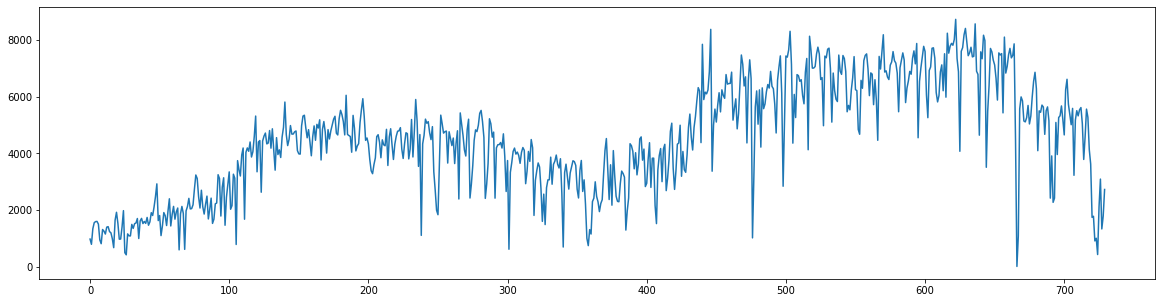

In [15]:
# visualise the pattern of demand (target variable - 'cnt') over period of two years
plt.figure(figsize=(20,5))
plt.plot(biking.cnt)
plt.show()

**Observation**



*   There is a growth over a period and now we are seeing less numbers of users comparetively.



Text(0.5, 1.0, 'Total Rental Bikes\n')

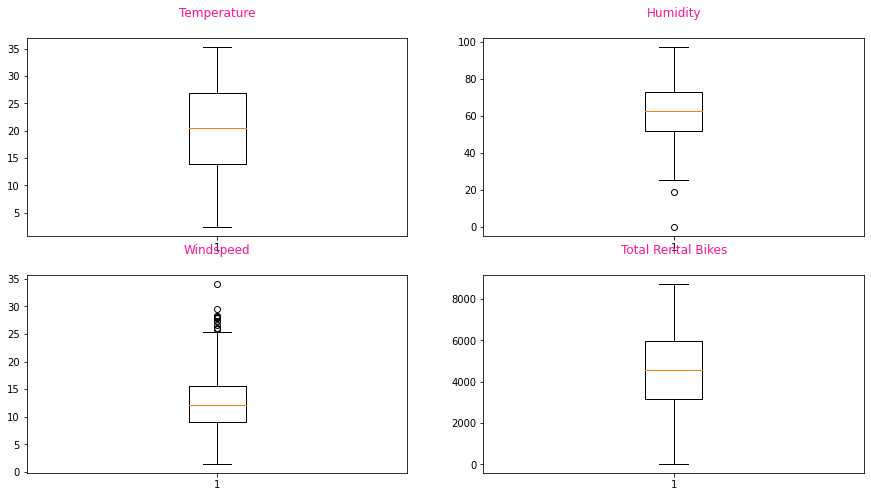

In [16]:
# Visualising numerical varibles

# selecting numerical variables
var = biking.select_dtypes(exclude = 'category').columns
plt.figure(figsize = (15, 8))
plt.subplot(2,2,1)
plt.boxplot(biking['temp'])
plt.title("Temperature\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.subplot(2,2,2)
plt.boxplot(biking['hum'])
plt.title("Humidity\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.subplot(2,2,3)
plt.boxplot(biking['windspeed'])
plt.title("Windspeed\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.subplot(2,2,4)
plt.boxplot(biking['cnt'])
plt.title("Total Rental Bikes\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})



**Analysis**

*   Humidity and Windspeed have few outliers



In [17]:
# get percentage outlier for hum and windspeed

# function to get outlier percentage
def percentage_outlier(x):
    iqr = biking[x].quantile(0.75) - biking[x].quantile(0.25)
    HL = biking[x].quantile(0.75) + iqr * 1.5
    LL = biking[x].quantile(0.25) - iqr * 1.5
    per_outlier = ((biking[x] < LL).sum()+(biking[x] > HL).sum())/len(biking[x])*100
    per_outlier = round(per_outlier,2)
    return(per_outlier)

print('Percentage of outlier (hum): ', percentage_outlier('hum'))
print('Percentage of outlier (windspeed): ', percentage_outlier('windspeed'))

Percentage of outlier (hum):  0.27
Percentage of outlier (windspeed):  1.78


Analysis:
- Percentage of outlier: 

        `hum`: `0.27` 
        `windspeed`: `1.78` 
- As these percentage is low and insignificant and therefore not removing it.

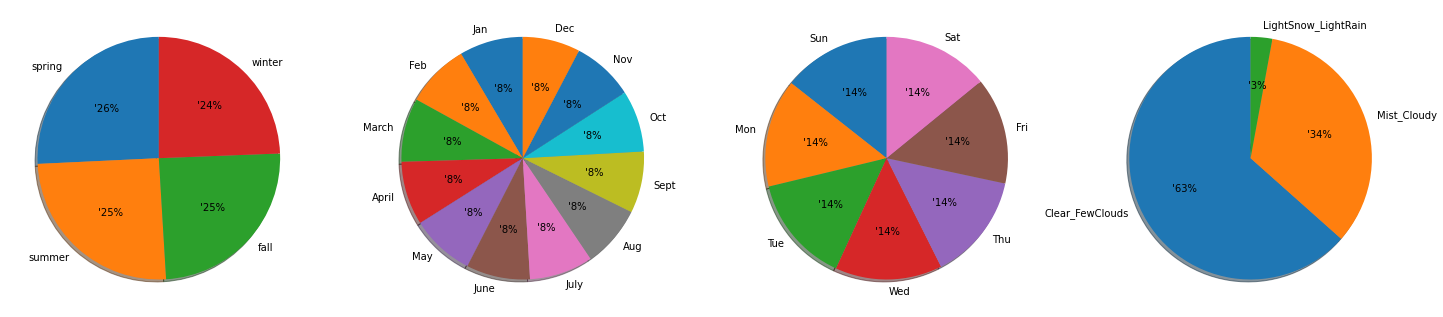

In [18]:
plt.figure(figsize = (25,20))
plt.subplot(1,4,1)
plt.pie(biking['season'].value_counts(), startangle = 90,  autopct = "'%1.0f%%", labels = ['spring', 'summer', 'fall', 'winter'], shadow = True)

plt.subplot(1,4,2)
plt.pie(biking['mnth'].value_counts(), startangle = 90,  autopct = "'%1.0f%%", labels = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], shadow = True)

plt.subplot(1,4,3)
plt.pie(biking['weekday'].value_counts(), startangle = 90,  autopct = "'%1.0f%%", labels = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'], shadow = True)

plt.subplot(1,4,4)
plt.pie(biking['weathersit'].value_counts(), startangle = 90,  autopct = "'%1.0f%%", labels = ['Clear_FewClouds', 'Mist_Cloudy', 'LightSnow_LightRain'], shadow = True)

warnings.filterwarnings('ignore')

**Analysis :**

Seasons: In all the four seasons, business is almost similar.<br>
Month: Every month has same percentage.<br>
weekdays: In all weekdays similar % of business.<br>
Weathersit : There are 4 categories but almost people would like to g for biking when the sky is clear or there are few clouds or partly cloudy. On the other hand, when there is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, no user is there

## **2.2 : Bivariate Analysis**

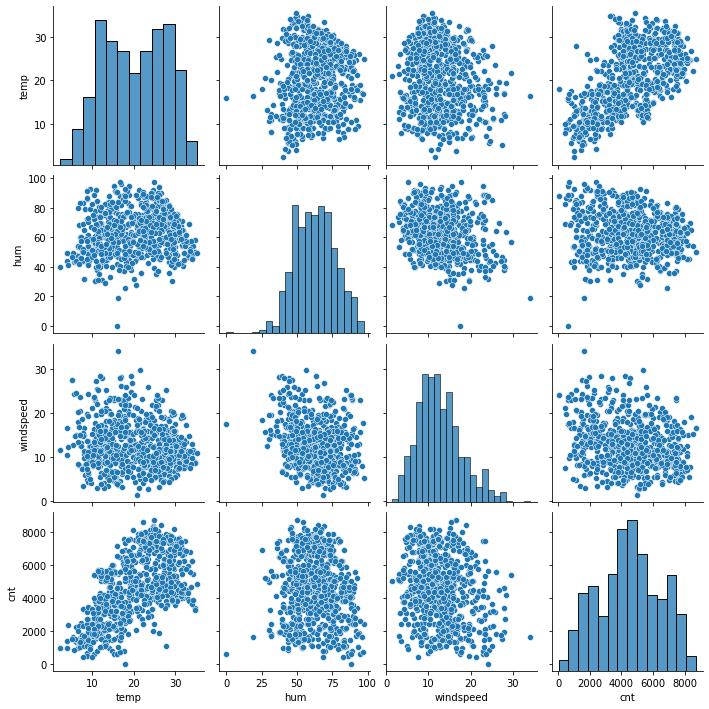

In [19]:
#Visualising the numeric variable
sns.pairplot(biking)
plt.show()
#In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. 
#This function uses Gaussian kernels and includes automatic bandwidth determination.

**Analysis:**<br>
`temp` has highest positive correlation with target variable `cnt`.

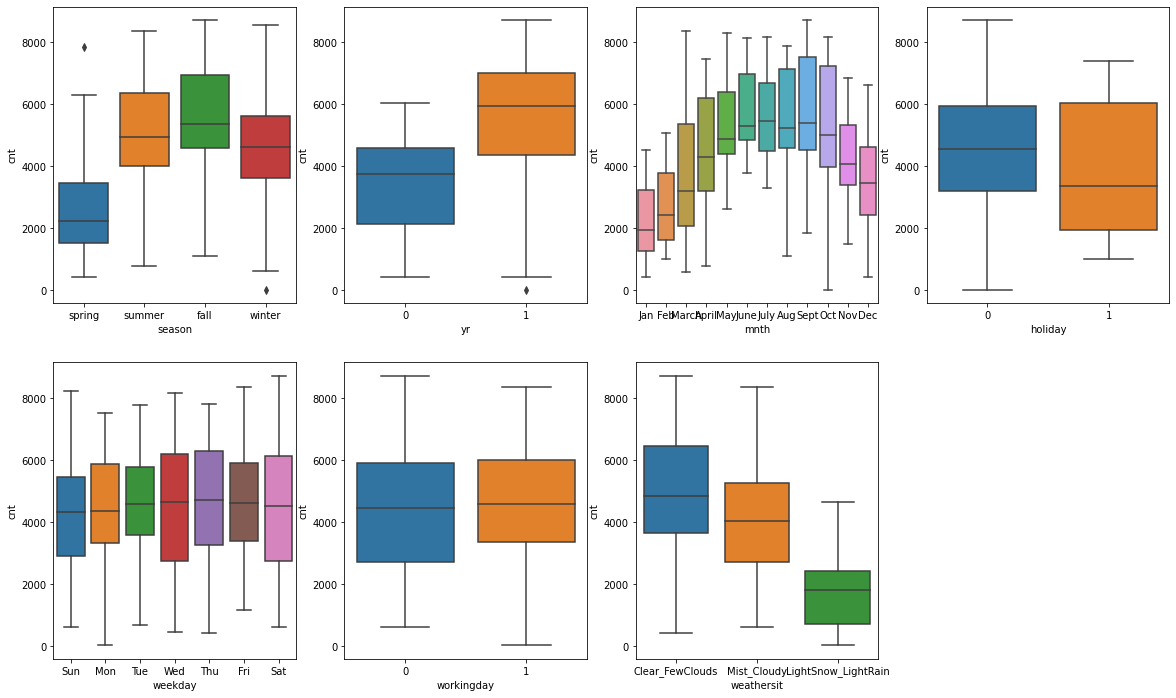

In [20]:
#Visualising the categorical variables
plt.figure(figsize = (20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = biking)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = biking)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = biking)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = biking)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = biking)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = biking)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = biking)

**Analysis**



*   There are 4 seasons (1:spring, 2:summer, 3:fall, 4:winter) and if you see the boxplot summer and fall have many users that took bikes on rent.

*   There are 2 years ((0: 2018, 1:2019) and according to chart, there are more users in 2019.

*   Whenever there is no holiday, more people are taking bikes on rent.
*   Weekdays have almost similar number of users.


*   Weathersit- There are 4 categories but almost people would like to g0 for biking when the sky is clear or there are few clouds or partly cloudy. On the other hand, when there is Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog, no user is there
  

# **STEP 3 - Data Preparation**

## **3.1 - Creating Dummy Variables - Encoding**

In [21]:
#Get Dummy Values for the categorical variables
dummy_vars = pd.get_dummies(biking[['season', 'weekday','mnth','weathersit']], drop_first=True)


In [22]:
# concat the dummy df with original df
biking = pd.concat([biking,dummy_vars], axis = 1)

In [23]:
# drop season column
biking.drop(['season','weekday','mnth','weathersit'], axis=1, inplace=True)

In [24]:
biking.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_Feb,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
#Columns and Rows
biking.shape

(730, 29)

In [26]:
#info
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   yr                              730 non-null    category
 1   holiday                         730 non-null    category
 2   workingday                      730 non-null    category
 3   temp                            730 non-null    float64 
 4   hum                             730 non-null    float64 
 5   windspeed                       730 non-null    float64 
 6   cnt                             730 non-null    int64   
 7   season_summer                   730 non-null    uint8   
 8   season_fall                     730 non-null    uint8   
 9   season_winter                   730 non-null    uint8   
 10  weekday_Mon                     730 non-null    uint8   
 11  weekday_Tue                     730 non-null    uint8   
 12  weekday_Wed           

In [27]:
#As three columns are comig under categorical dtype so these have to be converted into uint8
# Convert categorical columns to numeric 
biking[['yr','holiday','workingday']]= biking[['yr','holiday','workingday']].astype('uint8')
biking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              730 non-null    uint8  
 1   holiday                         730 non-null    uint8  
 2   workingday                      730 non-null    uint8  
 3   temp                            730 non-null    float64
 4   hum                             730 non-null    float64
 5   windspeed                       730 non-null    float64
 6   cnt                             730 non-null    int64  
 7   season_summer                   730 non-null    uint8  
 8   season_fall                     730 non-null    uint8  
 9   season_winter                   730 non-null    uint8  
 10  weekday_Mon                     730 non-null    uint8  
 11  weekday_Tue                     730 non-null    uint8  
 12  weekday_Wed                     730 

## **3.2 - Splitting data into train and test**

In [28]:
df_train, df_test = train_test_split(biking, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(220, 29)


## **3.3 - Scaling of Dataset**

- During EDA we could observe that there is different range of data in the data set. So it becomes important to scale the data. 
- Here we will be using Min-Max scaling (normalisation) to scale both training and tesing dataset.

In [29]:
# 1. Instantiate an object 
scaler = MinMaxScaler()

#Create a list of numeric vars 
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

#2. Fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_Feb,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_Feb,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.247059,0.262745,0.247059,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.066667,0.098039,0.078431,0.084314,0.076471,0.076471,0.096078,0.080392,0.084314,0.086275,0.084314,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.431725,0.440557,0.431725,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.249689,0.297660,0.269113,0.278131,0.266010,0.266010,0.294988,0.272166,0.278131,0.281045,0.278131,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   yr                              510 non-null    uint8  
 1   holiday                         510 non-null    uint8  
 2   workingday                      510 non-null    uint8  
 3   temp                            510 non-null    float64
 4   hum                             510 non-null    float64
 5   windspeed                       510 non-null    float64
 6   cnt                             510 non-null    float64
 7   season_summer                   510 non-null    uint8  
 8   season_fall                     510 non-null    uint8  
 9   season_winter                   510 non-null    uint8  
 10  weekday_Mon                     510 non-null    uint8  
 11  weekday_Tue                     510 non-null    uint8  
 12  weekday_Wed                     51

# **STEP 4 : Training The Model**

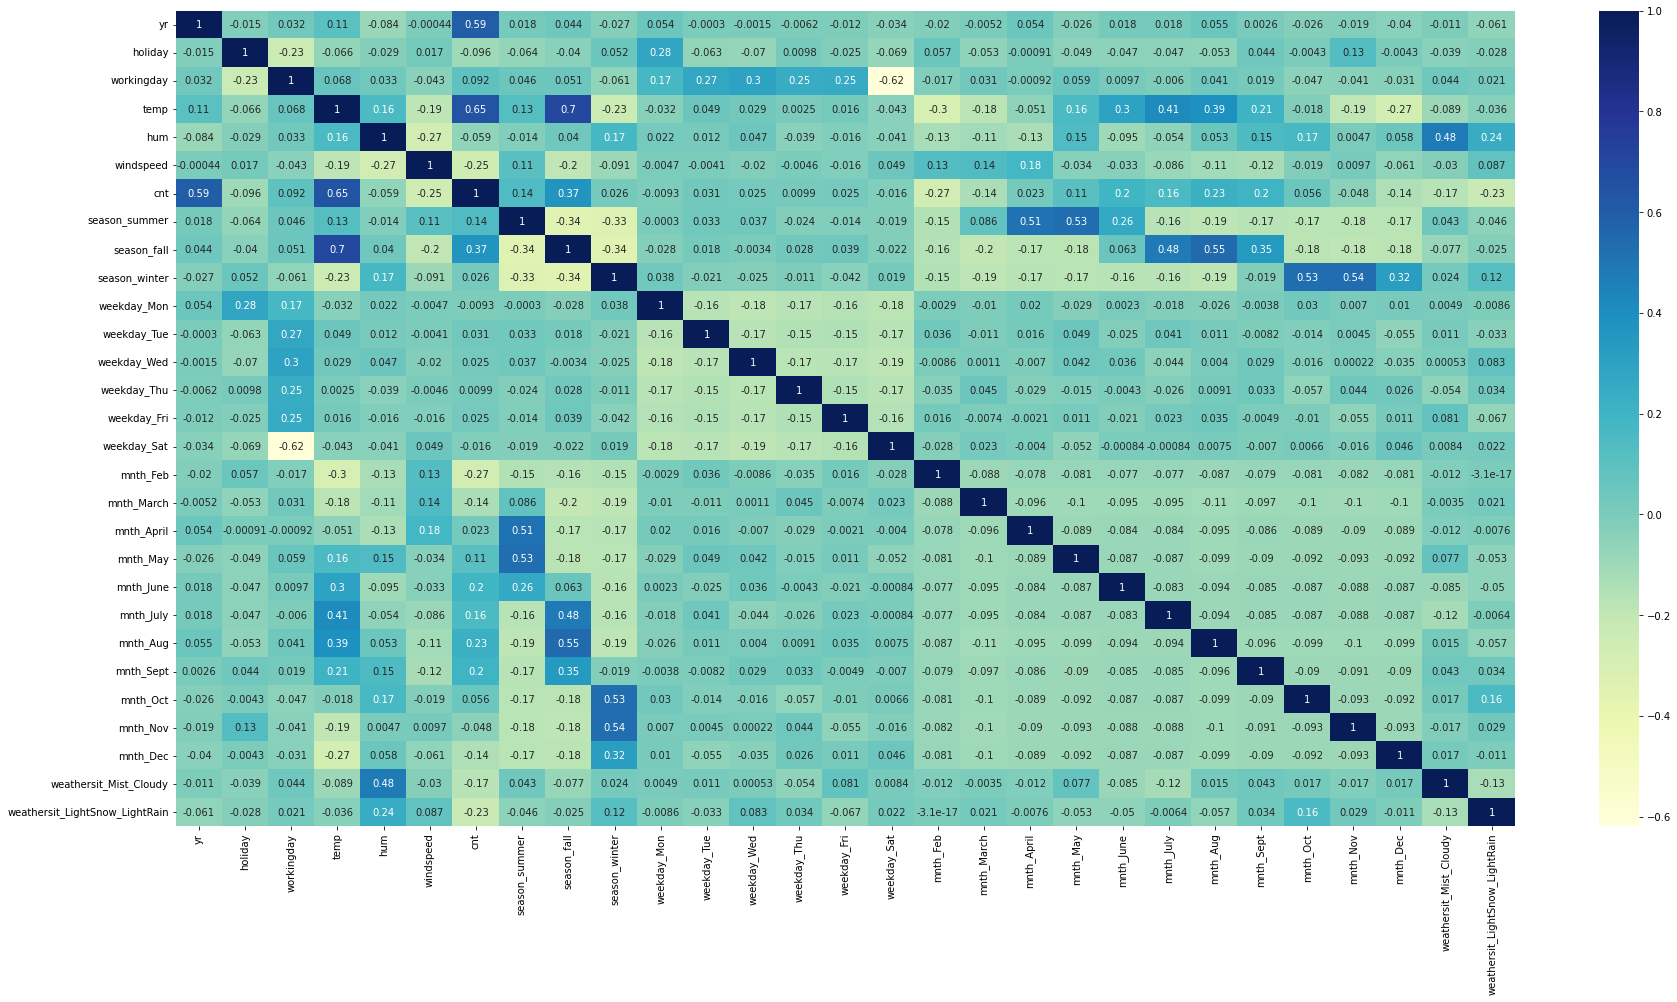

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated
#heatmap
plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

**4.1 - Dividing into X and Y sets for the model building**

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

**4.2 - Adding all the variables to the model**

In [34]:
# Check all the columns of the dataframe

biking.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_summer', 'season_fall', 'season_winter', 'weekday_Mon',
       'weekday_Tue', 'weekday_Wed', 'weekday_Thu', 'weekday_Fri',
       'weekday_Sat', 'mnth_Feb', 'mnth_March', 'mnth_April', 'mnth_May',
       'mnth_June', 'mnth_July', 'mnth_Aug', 'mnth_Sept', 'mnth_Oct',
       'mnth_Nov', 'mnth_Dec', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

In [35]:
# create function for stats linear model 
def sm_Linear_Model(X_train_sm):
  
    #Add constant
    X_train_sm = sm.add_constant(X_train_sm)

    # create a fitted model (1st model)
    lm = sm.OLS(y_train,X_train_sm).fit()
    return lm

In [36]:
# writing Function to calculate the VIF
def vif_calc(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

In [37]:
# Creating 1st stats model for summary and VIF value
lm_1 = sm_Linear_Model(X_train)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.00e-181
Time:                        14:16:34   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   We are getting p-value > 0.05, so now we have to drop those values
*   Further R-squared - 0.853 & Adj. R-squared - 0.844


*   Some variables have VIF value infinite- thats means there is high corelation between variables




## **Model - 1 - Dropping variable and updating the model**

In [38]:
X_train = X_train.drop('weekday_Thu', axis = 1)

In [39]:
# Creating 1st stats model for summary and VIF value
lm_1 = sm_Linear_Model(X_train)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.00e-181
Time:                        14:16:34   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `weekday_Thu` as it has highest p-value 0.864.
*   Further R-squared - 0.853 & Adj. R-squared - 0.844-no change in these values.
*   Now no VIF value is equal to infinite.


## **Model - 2 : Dropping variable and updating the model**

In [40]:
X_train = X_train.drop('weekday_Wed', axis = 1)

In [41]:
# Creating 1st stats model for summary and VIF value
lm_2 = sm_Linear_Model(X_train)
print(lm_2.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.95e-182
Time:                        14:16:34   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `weekday_Wed` as it has highest p-value 0.804.
*   Further R-squared - 0.853 & Adj. R-squared - 0.845-no change in these values.
*   Still p-values are high, so will be dropping in next step.

## **Model - 3**

In [42]:
X_train = X_train.drop('weekday_Fri', axis = 1)

In [43]:
# Creating 1st stats model for summary and VIF value
lm_3 = sm_Linear_Model(X_train)
print(lm_3.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.19e-183
Time:                        14:16:35   Log-Likelihood:                 526.84
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.6
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `weekday_Fri` as it has highest p-value 0.592.
*   Further R-squared - 0.852 & Adj. R-squared - 0.845-no change in these values.
*   Still p-values are high, so will be dropping in next step.

## **Model - 4**

In [44]:
X_train = X_train.drop('mnth_July', axis = 1)

In [45]:
# Creating 1st stats model for summary and VIF value
lm_4 = sm_Linear_Model(X_train)
print(lm_4.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.71e-184
Time:                        14:16:35   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     485   BIC:                            -897.3
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_July` as it has highest p-value 0.487.
*   Further R-squared - 0.852 & Adj. R-squared - 0.845-no change in these values.
*   By dropping this variable, VIF values have dropped down.

## **Model - 5**

In [46]:
X_train = X_train.drop('mnth_Nov', axis = 1)

In [47]:
# Creating 1st stats model for summary and VIF value
lm_1 = sm_Linear_Model(X_train)
print(lm_1.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     121.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.60e-185
Time:                        14:16:35   Log-Likelihood:                 526.50
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     486   BIC:                            -903.4
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_Nov` as it has highest p-value 0.686.
*   Further R-squared - 0.852 & Adj. R-squared - 0.845-no change in these values.

## **Model - 6**

In [48]:
X_train = X_train.drop('mnth_Dec', axis = 1)

In [49]:
# Creating 1st stats model for summary and VIF value
lm_6 = sm_Linear_Model(X_train)
print(lm_6.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.23e-186
Time:                        14:16:35   Log-Likelihood:                 526.48
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     487   BIC:                            -909.6
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_Dec` as it has highest p-value 0.825.
*   Further R-squared - 0.852 & Adj. R-squared - 0.846-no change in these values.

## **Model - 7**

In [50]:
X_train = X_train.drop('weekday_Tue', axis = 1)

In [51]:
# Creating 1st stats model for summary and VIF value
lm_7 = sm_Linear_Model(X_train)
print(lm_7.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     133.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.75e-187
Time:                        14:16:35   Log-Likelihood:                 525.90
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     488   BIC:                            -914.6
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `weekday_Tue` as it has highest p-value 0.295.
*   Further R-squared - 0.852 & Adj. R-squared - 0.846-no change in these values.

## **Model - 8**

In [52]:
X_train = X_train.drop('weekday_Mon', axis = 1)

In [53]:
# Creating 1st stats model for summary and VIF value
lm_8 = sm_Linear_Model(X_train)
print(lm_8.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          7.28e-188
Time:                        14:16:35   Log-Likelihood:                 525.26
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `weekday_Mon` as it has highest p-value 0.268.
*   Further R-squared - 0.852 & Adj. R-squared - 0.846-no change in these values.

## **Model - 9**

In [54]:
X_train = X_train.drop('mnth_Feb', axis = 1)

In [55]:
# Creating 1st stats model for summary and VIF value
lm_9 = sm_Linear_Model(X_train)
print(lm_9.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.29e-188
Time:                        14:16:36   Log-Likelihood:                 524.44
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     490   BIC:                            -924.2
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_Feb` as it has highest p-value 0.210.
*   Further R-squared - 0.851 & Adj. R-squared - 0.846-no change in these values.

## **Model - 10**

In [56]:
X_train = X_train.drop('mnth_April', axis = 1)

In [57]:
# Creating 1st stats model for summary and VIF value
lm_10 = sm_Linear_Model(X_train)
print(lm_10.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     154.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.84e-189
Time:                        14:16:36   Log-Likelihood:                 523.05
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     491   BIC:                            -927.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_April` as it has highest p-value 0.103.
*   Further R-squared - 0.850 & Adj. R-squared - 0.846-no change in these values.

## **Model -11**

In [58]:
X_train = X_train.drop('mnth_June', axis = 1)

In [59]:
# Creating 1st stats model for summary and VIF value
lm_11 = sm_Linear_Model(X_train)
print(lm_11.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     163.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          5.55e-190
Time:                        14:16:36   Log-Likelihood:                 522.40
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     492   BIC:                            -932.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_June` as it has highest p-value 0.261.
*   Further R-squared - 0.850 & Adj. R-squared - 0.845-no change in these values.

## **Model - 12**

In [60]:
X_train = X_train.drop('mnth_May', axis = 1)

In [61]:
# Creating 1st stats model for summary and VIF value
lm_12 = sm_Linear_Model(X_train)
print(lm_12.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.46e-190
Time:                        14:16:36   Log-Likelihood:                 521.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     493   BIC:                            -936.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Analysis :**

*   In this we have dropped `mnth_May` as it has highest p-value 0.112.
*   Further R-squared - 0.849 & Adj. R-squared - 0.844-minute change in these values.


*   VIF: `temp` is having high VIF. But as explained earlier we will look for next highest VIF `season_fall (8.5)` which is >5. We will drop `season_fall` and update the model.


## **Model - 13**

In [63]:
X_train = X_train.drop('season_fall', axis = 1)

In [64]:
# Creating 1st stats model for summary and VIF value
lm_11 = sm_Linear_Model(X_train)
print(lm_11.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.17e-191
Time:                        14:16:49   Log-Likelihood:                 519.66
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `season_fall` as it has highest p-value 0.097.
*   Further R-squared - 0.848 & Adj. R-squared - 0.844-minute change in these values.


*   VIF values have dropped down.


## **Model - 14**

In [65]:
X_train = X_train.drop('mnth_March', axis = 1)

In [66]:
# Creating 1st stats model for summary and VIF value
lm_14 = sm_Linear_Model(X_train)
print(lm_14.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.70e-192
Time:                        14:16:49   Log-Likelihood:                 518.52
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     495   BIC:                            -943.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_March` as it has highest p-value 0.139.
*   Further R-squared - 0.848 & Adj. R-squared - 0.843-minute change in these values.



## **Model - 15**

In [67]:
X_train = X_train.drop('hum', axis = 1)

In [68]:
# Creating 1st stats model for summary and VIF value
lm_15 = sm_Linear_Model(X_train)
print(lm_15.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.97e-188
Time:                        14:16:50   Log-Likelihood:                 507.76
No. Observations:                 510   AIC:                            -987.5
Df Residuals:                     496   BIC:                            -928.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `hum` as it has highest VIF value - 16.57 and there is no p-value less than 0.05
*   Further R-squared - 0.841 & Adj. R-squared - 0.837-minute change in these values.


## **Model -16**

In [69]:
X_train = X_train.drop('mnth_Oct', axis = 1)

In [70]:
# Creating 1st stats model for summary and VIF value
lm_16 = sm_Linear_Model(X_train)
print(lm_16.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          8.64e-189
Time:                        14:16:50   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_Oct` as p-value - 0.052
*   Further R-squared - 0.840 & Adj. R-squared - 0.836-minute change in these values.

## **Model - 17**

In [71]:
X_train = X_train.drop('workingday', axis = 1)

In [72]:
# Creating 1st stats model for summary and VIF value
lm_17 = sm_Linear_Model(X_train)
print(lm_17.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.10e-186
Time:                        14:16:50   Log-Likelihood:                 498.00
No. Observations:                 510   AIC:                            -972.0
Df Residuals:                     498   BIC:                            -921.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `workingday` as p-value - 0.000 and there is second highest VIF value - 4.35
*   Further R-squared - 0.835 & Adj. R-squared - 0.831-minute change in these values.

## **Model - 18**

In [73]:
X_train = X_train.drop('weekday_Sat', axis = 1)

In [74]:
# Creating 1st stats model for summary and VIF value
lm_18 = sm_Linear_Model(X_train)
print(lm_18.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.62e-187
Time:                        14:16:50   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `weekday_Sat` as p-value - 0.100.
*   Further R-squared - 0.834 & Adj. R-squared - 0.831-minute change in these values.

## **Model -19**

In [75]:
X_train = X_train.drop('mnth_Aug', axis = 1)

In [76]:
# Creating 1st stats model for summary and VIF value
lm_19 = sm_Linear_Model(X_train)
print(lm_19.summary())

# Calculate VIF
print(vif_calc(X_train))

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.83e-186
Time:                        14:16:50   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Analysis :**

*   In this we have dropped `mnth_Aug` as p-value - 0.001.
*   Further R-squared - 0.830 & Adj. R-squared - 0.827-1 percent change in these values.

In [77]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter',
       'mnth_Sept', 'weathersit_Mist_Cloudy',
       'weathersit_LightSnow_LightRain'],
      dtype='object')

**Analysis:**
- After dropping the variable `mnth_Aug` and updating model, we could see `R-squared: 0.830` and `Adj R-squared : 0.827`. There is no significant change in R-squared or adj. 
- All the variables are having pvalue alomost zero and all VIF is also < 5. 
- There is no significant change in Adj R-squared for `Model -19` however we could reduce one independent variable. So we will choose `Model -19` as our final model.

**Final Model and its variables:**

In [78]:
# List down final model varibales and its coefficients

# assign final model to lm_final
lm_final = lm_19

# list down and check variables of final model
var_final = list(lm_final.params.index)
var_final.remove('const')
print('Final Selected Variables:', var_final)

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

Final Selected Variables: ['yr', 'holiday', 'temp', 'windspeed', 'season_summer', 'season_winter', 'mnth_Sept', 'weathersit_Mist_Cloudy', 'weathersit_LightSnow_LightRain']

Coefficent for the variables are:
const                             0.126
yr                                0.233
holiday                          -0.099
temp                              0.548
windspeed                        -0.153
season_summer                     0.088
season_winter                     0.129
mnth_Sept                         0.101
weathersit_Mist_Cloudy           -0.078
weathersit_LightSnow_LightRain   -0.283
dtype: float64


# **Step 5: Residual Analysis of the train data**

In [79]:
# Select final variables from the test dataset
X_train_res = X_train[var_final]

In [80]:
#Add constant
X_train_res = sm.add_constant(X_train_res)

# predict train set
y_train_pred = lm_final.predict(X_train_res)

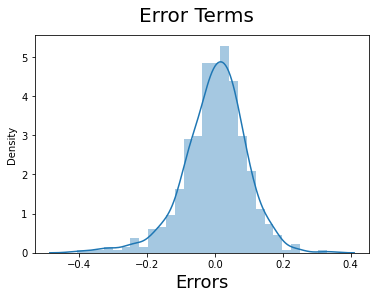

In [81]:
# distrubition plot for residue
res = y_train - y_train_pred
fig = plt.figure()
sns.distplot(res)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

- The distribution plot of error term shows the normal distribution with mean at Zero.

# **STEP 6 : Making Predictions Using the Final Model**

## **6.1 - Applying the scaling on the test sets**

In [82]:
#Create a list of numeric vars 
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

#2. Transform on test data
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_Feb,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [83]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_summer,season_fall,season_winter,weekday_Mon,weekday_Tue,weekday_Wed,weekday_Thu,weekday_Fri,weekday_Sat,mnth_Feb,mnth_March,mnth_April,mnth_May,mnth_June,mnth_July,mnth_Aug,mnth_Sept,mnth_Oct,mnth_Nov,mnth_Dec,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.263636,0.245455,0.236364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.100000,0.054545,0.090909,0.086364,0.095455,0.104545,0.059091,0.086364,0.086364,0.072727,0.086364,0.318182,0.027273
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.441609,0.431338,0.425817,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.300684,0.227609,0.288135,0.281541,0.294512,0.306665,0.236333,0.281541,0.281541,0.260281,0.281541,0.466833,0.163248
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **6.2 - Dividing into X_test and y_test**

In [84]:
y_test = df_test.pop('cnt')
X_test = df_test

In [85]:
# select final variables from X_test
X_test_sm = X_test[var_final]
X_test_sm.head()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Sept,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,0,1,0.831783,0.084219,0,0,0,1,0
535,1,0,0.901354,0.153728,1,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0
221,0,0,0.881625,0.339570,0,0,0,0,0
152,0,0,0.817246,0.537414,1,0,0,0,0


In [86]:
#Add a Constant
X_test_sm = sm.add_constant(X_test_sm)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_Sept,weathersit_Mist_Cloudy,weathersit_LightSnow_LightRain
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0
535,1.0,1,0,0.901354,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,1,0,0,0,0


In [87]:
# predict test dataset
y_test_pred = lm_final.predict(X_test_sm)

## **6.3 Evaluate the model on test set**

In [88]:
#Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error
# Get R-Squared fro test dataset
r2_test = r2_score(y_true = y_test, y_pred = y_test_pred)
print('R-Squared for Test dataset: ', round(r2_test,3))

R-Squared for Test dataset:  0.794


In [89]:
# Adj. R-Squared for test dataset
N= len(X_test)          # sample size
p =len(var_final)     # Number of independent variable
r2_test_adj = round((1-((1-r2_test)*(N-1)/(N-p-1))),3)
print('Adj. R-Squared for Test dataset: ', round(r2_test_adj,3))

Adj. R-Squared for Test dataset:  0.785


In [90]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_test_pred)
print('Mean_Squared_Error :' ,round(mse,4))

Mean_Squared_Error : 0.0098


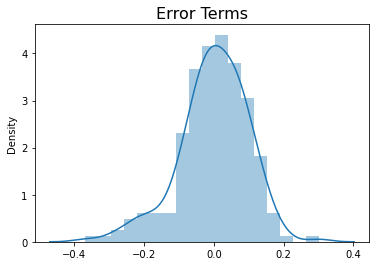

In [91]:
res_test = y_test - y_test_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

Text(0, 0.5, 'Residual')

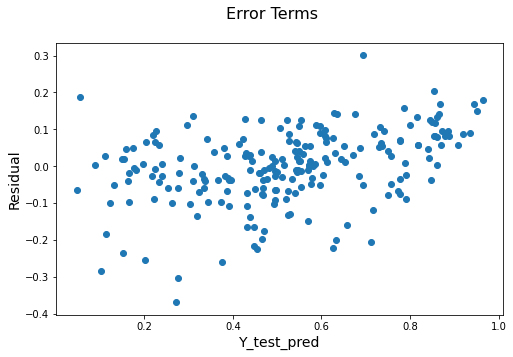

In [92]:
# Error terms
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(8,5))
plt.scatter(y_test,res_test)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_test_pred', fontsize=14)                      # X-label
plt.ylabel('Residual', fontsize=14)   

It seems like the corresponding residual plot is reasonably random

Text(0, 0.5, 'y_test_pred')

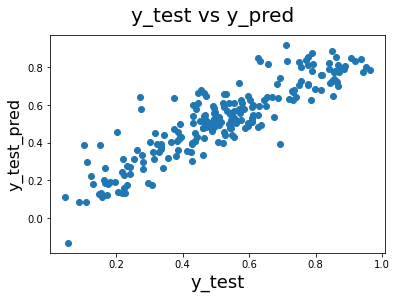

In [93]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16) 

**Analysis:**
- We can colude that the model `lr_model` fit isn't by chance, and has descent predictive power.

# **STEP - 7 : Conclusions**

In [94]:
# Print R Squared and adj. R Squared
print('R- Sqaured train: ', round(lm_final.rsquared,2), '  Adj. R-Squared train:', round(lm_final.rsquared_adj,3) )
print('R- Sqaured test : ', round(r2_test,2), '  Adj. R-Squared test :', round(r2_test_adj,3))

# Print the coefficents of final varible
print('\033[1m{:10s}\033[0m'.format('\nCoefficent for the variables are:'))
print(round(lm_final.params,3))

R- Sqaured train:  0.83   Adj. R-Squared train: 0.827
R- Sqaured test :  0.79   Adj. R-Squared test : 0.785

Coefficent for the variables are:
const                             0.126
yr                                0.233
holiday                          -0.099
temp                              0.548
windspeed                        -0.153
season_summer                     0.088
season_winter                     0.129
mnth_Sept                         0.101
weathersit_Mist_Cloudy           -0.078
weathersit_LightSnow_LightRain   -0.283
dtype: float64


- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain almost 80% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:
    1. Temperature (0.548)
    2. weathersit : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.283)
    3. year (0.233)


- **So it recomended to give these variables utmost importance while planning to achieve maximum demand.**